### Notebook useful to test simulators

#### COLAB Prerequs

In [ ]:
!pip install git+https://github.com/AlexanderFengler/ssm_simulators

#### Main scripts

In [7]:
import numpy as np
import pandas as pd
import ssms
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# List some of the models that we can simulate from with ssms
# 'ds_conflict' and 'ds_conflict_angle' are the ones we care about here
list(ssms.config.model_config.keys())[:12]

['ddm',
 'ddm_legacy',
 'angle',
 'weibull',
 'levy',
 'levy_angle',
 'full_ddm',
 'gamma_drift',
 'gamma_drift_angle',
 'ds_conflict_drift',
 'ds_conflict_drift_angle',
 'ornstein']

In [3]:
# Check the model config
ssms.config.model_config['ds_conflict_drift']

{'name': 'ds_conflict_drift',
 'params': ['a',
  'z',
  't',
  'tinit',
  'dinit',
  'tslope',
  'dslope',
  'tfixedp',
  'tcoh',
  'dcoh'],
 'param_bounds': [[0.3, 0.1, 0.001, 0, 0, 0.01, 0.01, 0, -1.0, -1.0],
  [3.0, 0.9, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 1.0, 1.0]],
 'boundary': <function ssms.basic_simulators.boundary_functions.constant(t=0)>,
 'drift_fun': <function ssms.basic_simulators.drift_functions.ds_conflict_drift(t=array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00]), init_p_t=0, init_p_d=0, slope_t=1, slope_d=1, fixed_p_t=1, coherence_t=1.5, coherence_d=1.5)>,
 'n_params': 10,
 'default_params': [2.0, 0.5, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 0.5, -0.5],
 'hddm_include': ['a',
  'z',
  't',
  'tinit',
  'dinit',
  'tslope',
  'dslope',
  'tfixedp',
  'tcoh',
  'dcoh'],
 'nchoices': 2}

**Note the parameter names:**

- `z` is initial bias
- `t` is non-decision time
- `tinit` is initial position of the target_v
- `dinit` is initial position of the distractor_v
- `tslope` is the slope in exponent for the dynamics of target_v
- `dslope` is the slope in exponent for the dynamics of distractor_v
- `tfixedp` is the fixed point for the target_v (note the fixed point for distractor is set to 0)
- `tcoh` is the coherence value for the target
- `dcoh` is the coherence value for the distractor

For now the coherence values are multiplied with target_v / distractor_v directly (no `tanh` function applied), so that the drift is composed of:

`v_t = target_v(t) * tcoh + distractor_v(t) * dcoh`

In [35]:
# Testrun simulator
from ssms.basic_simulators import simulator

model = 'ds_conflict_drift'
theta = ssms.config.model_config[model]['default_params'] 
theta[ssms.config.model_config[model]['params'].index('tfixedp')] = 5
theta[ssms.config.model_config[model]['params'].index('a')] = 1.5
theta[ssms.config.model_config[model]['params'].index('tinit')] = 5
theta[ssms.config.model_config[model]['params'].index('dinit')] = 0
theta[ssms.config.model_config[model]['params'].index('tcoh')] = 1
theta[ssms.config.model_config[model]['params'].index('dcoh')] = 0
theta[ssms.config.model_config[model]['params'].index('t')] = 0
sim_out = simulator(model = model, 
                    theta = theta,
                    n_samples = 10000)

# For comparison some simulations from the basic ddm
# Note this can be helpful because the ddm is a special case
# of the ds_conflict model (for specific parameter settings)

model_base = 'ddm'
theta = ssms.config.model_config[model_base]['default_params'] 
theta[ssms.config.model_config[model_base]['params'].index('v')] = 5
theta[ssms.config.model_config[model_base]['params'].index('a')] = 1.5
theta[ssms.config.model_config[model_base]['params'].index('t')] = 0
sim_out_base = simulator(model = model_base, 
                    theta = theta,
                    n_samples = 10000)

In [36]:
# Note the simulator returns a dictionary
# with three elements
# 'rts', 'choices', 'metadata'

print("sim_out['rts'] is a numpy array: \n", sim_out['rts'], " \n\n" )
print("sim_out['choices'] is a numpy array: \n", sim_out['rts'], " \n\n")
print("sim_out['metadata'] is a dictionary with all sorts of information about the simulator call: \n", 
      sim_out['metadata'],)

sim_out['rts'] is a numpy array: 
 [[0.2979997 ]
 [0.39599845]
 [0.33899918]
 ...
 [0.57599616]
 [0.38299862]
 [0.32399938]]  


sim_out['choices'] is a numpy array: 
 [[0.2979997 ]
 [0.39599845]
 [0.33899918]
 ...
 [0.57599616]
 [0.38299862]
 [0.32399938]]  


sim_out['metadata'] is a dictionary with all sorts of information about the simulator call: 
 {'v': array([0.], dtype=float32), 'a': array([1.5], dtype=float32), 'z': array([0.5], dtype=float32), 't': array([0.], dtype=float32), 's': 1.0, 'init_p_t': array([5.], dtype=float32), 'init_p_d': array([0.], dtype=float32), 'slope_t': array([2.], dtype=float32), 'slope_d': array([2.], dtype=float32), 'fixed_p_t': array([5.], dtype=float32), 'coherence_t': array([1.], dtype=float32), 'coherence_d': array([0.], dtype=float32), 'delta_t': 0.0010000000474974513, 'max_t': 20.0, 'n_samples': 10000, 'simulator': 'ddm_flex', 'boundary_fun_type': 'constant', 'drift_fun_type': 'constant', 'possible_choices': [-1, 1], 'trajectory': array([[ 0.000

(-3.0, 3.0)

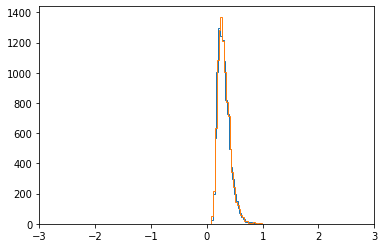

In [19]:
# Plot the reaction times
plt.hist(sim_out['rts'] * sim_out['choices'], bins = 30, histtype = 'step')
plt.hist(sim_out_base['rts'] * sim_out_base['choices'], bins = 30, histtype = 'step')
plt.xlim((-3, 3))

(-6.0, 6.0)

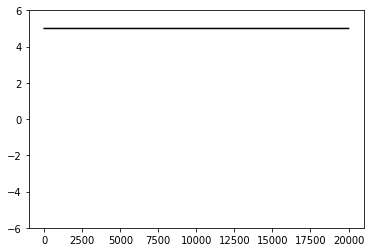

In [23]:
# Plot the net drift of the `ds_conflict_drift` model
# Plotting
plt.plot(sim_out['metadata']['drift'],
         color = 'black')
plt.ylim((-6, 6))